# 手动实现前馈神经网络解决回归任务

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1 手动生成回归任务的数据集

数据集的大小为10000且训练集大小为7000，测试集大小为3000，数据集的样本特征维度p为500，且服从如下的高维线性函数:$y = 0.028 + \sum_{i=1}^p0.0056x_i +$，设置噪声项服从均值为0、标准差为0.001的正态分布

In [2]:
num_train, num_test, num_inputs,num_hiddens, num_outputs= 7000, 3000, 500, 256, 1
true_w, true_b = torch.ones(num_inputs, 1) * 0.0056, 0.028
features = torch.randn((num_train + num_test, num_inputs))
labels = torch.matmul(features, true_w)+true_b
labels += torch.tensor(np.random.normal(0, 0.001, size=labels.size()), dtype=torch.float)
train_features, test_features = features[:num_train, :], features[num_train:, :]
train_labels, test_labels = labels[:num_train], labels[num_train:]

## 2 采用 torch.utils.data.DataLoader 读取小批量数据

In [3]:
batch_size = 50
num_epochs = 100
lr = 0.0001

In [4]:
dataset = torch.utils.data.TensorDataset(train_features,train_labels)
train_iter = torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)
dataset1 = torch.utils.data.TensorDataset(test_features,test_labels)
test_iter = torch.utils.data.DataLoader(dataset1,batch_size,shuffle=True)

## 3 模型参数定义及初始化

In [5]:
W1 = torch.tensor(np.random.normal(0,0.01,(num_hiddens,num_inputs)),dtype=torch.float,requires_grad=True)
b1 = torch.zeros(num_hiddens,dtype = torch.float,requires_grad=True)
W2 = torch.tensor(np.random.normal(0,0.01,(num_outputs,num_hiddens)),dtype=torch.float,requires_grad=True)
b2 = torch.zeros(num_outputs,dtype = torch.float,requires_grad=True)
params=[W1,b1,W2,b2]

## 4 定义激活函数

选用ReLU作为激活函数

In [6]:
def relu(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

# def relu(x):
#     return torch.max(input=x,other=torch.tensor(0.0))

## 5 定义均方损失函数

In [7]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

## 6 定义随机梯度下降函数

In [8]:
def sgd(params, lr):
    for param in params:
        param.data -= lr * param.grad / batch_size

## 7 定义模型

In [9]:
def net(X):
    X=X.view((-1,num_inputs))
    H = relu(torch.matmul(X, W1.t()) + b1)
    return torch.matmul(H,W2.t())+b2

## 8 模型训练，保存训练集和验证集的loss

In [10]:
x_l = []
train_loss = []
test_loss = []

In [11]:
net = net
loss = squared_loss
for epoch in range(num_epochs):
    for x, y in train_iter:
        l = loss(net(x), y).sum()
        l.backward()
        sgd(params, lr)
        W1.grad.data.zero_()
        W2.grad.data.zero_()
        b1.grad.data.zero_()
        b2.grad.data.zero_()
    train_l = loss(net(train_features), train_labels)
    test_l = loss(net(test_features), test_labels)
    x_l.append(epoch + 1)
    train_loss.append(train_l.mean().item())
    test_loss.append(test_l.mean().item())
    if epoch%10 == 0:
        print("epoch: {}, train_loss: {:.4f}, test_loss: {:.4f}".format(epoch + 1, train_l.mean().item(), test_l.mean().item()))

epoch: 1, train_loss: 0.0111, test_loss: 0.0114
epoch: 11, train_loss: 0.0107, test_loss: 0.0109
epoch: 21, train_loss: 0.0102, test_loss: 0.0105
epoch: 31, train_loss: 0.0099, test_loss: 0.0102
epoch: 41, train_loss: 0.0095, test_loss: 0.0098
epoch: 51, train_loss: 0.0092, test_loss: 0.0095
epoch: 61, train_loss: 0.0089, test_loss: 0.0093
epoch: 71, train_loss: 0.0087, test_loss: 0.0090
epoch: 81, train_loss: 0.0084, test_loss: 0.0088
epoch: 91, train_loss: 0.0082, test_loss: 0.0086


## 9 绘制loss曲线

In [12]:
def Draw_Loss_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss Function")
    plt.plot(x_l, train_loss, label=u'Train Loss')
    plt.legend()
    p2 = plt.plot(x_l, test_loss, label=u'Test Loss')
    plt.legend()
    plt.show()

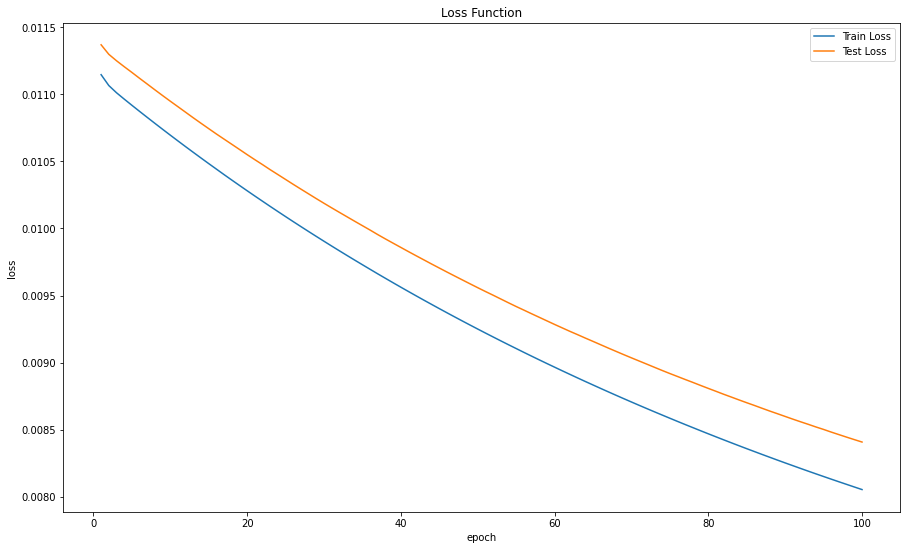

In [13]:
Draw_Loss_Curve()